In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.size'] = 14.0
#plt.rcParams['font.family'] = 'serif' 
#plt.rcParams['text.usetex'] = True
#plt.rc('text.latex', preamble=r'\usepackage{bm}')

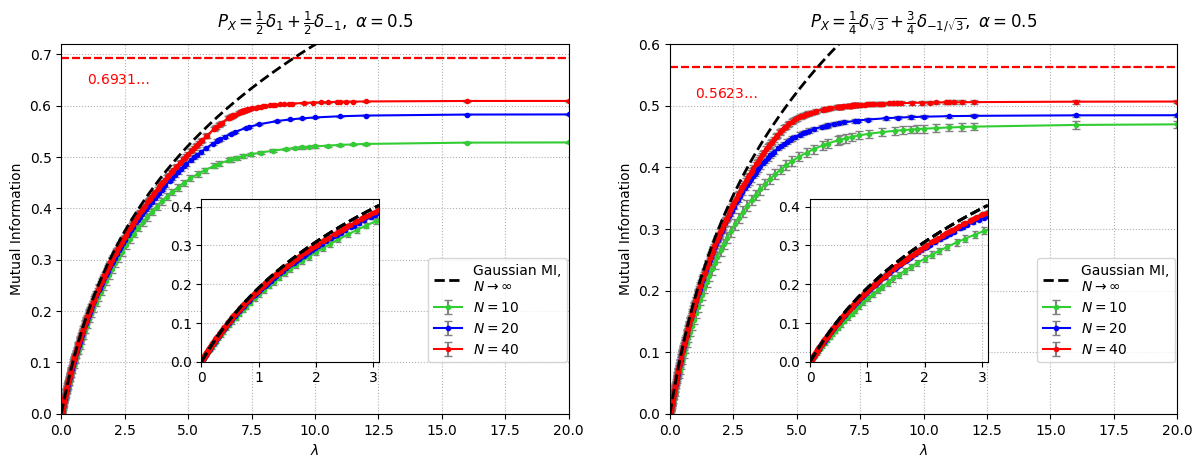

In [15]:

alpha = 0.5
fig, ax = plt.subplots(1,2,figsize=(0.8 * 18, 0.8 * 6))
colorlist = ["limegreen", "blue", "red", "magenta"]
Nlist = [10, 20, 40]
Wishart_MI = np.loadtxt("WishartMI_alpha5.000.txt")

for prior in ["Rademacher", "NonSym"]:
    prior_idx = 0 if prior == "Rademacher" else 1
    prefix = prior + "_alpha" + "{:.2f}".format(alpha)
    date = "1007" if prior == "Rademacher" else "0305"
    MI0 = -0.75*np.log(0.75) - 0.25*np.log(0.25) if prior == "NonSym" else np.log(2)
    ylim_ = 0.6 if prior == "NonSym" else 0.72
    title_ = r"$P_X = \frac{1}{4}\delta_{\sqrt{3}} + \frac{3}{4}\delta_{-1/\sqrt{3}},\ \alpha = 0.5$" if prior == "NonSym" else r"$P_X = \frac{1}{2}\delta_{1} + \frac{1}{2}\delta_{-1},\ \alpha = 0.5$"
    ax[prior_idx].set_title(title_, y=1.02)
    ax_inset = inset_axes( ax[prior_idx], bbox_to_anchor=(0.29, 0.16, 0.35,0.44), width="100%", height="100%", bbox_transform=ax[prior_idx].transAxes)
    ax_inset.set_ylim(0, 0.42)
    ax[prior_idx].set_ylabel("Mutual Information")
    ax[prior_idx].plot(Wishart_MI[:, 0], Wishart_MI[:, 1], 
        label="Gaussian MI,\n" + r"$N \to \infty$",
          color="black", lw = 2, zorder = 100, linestyle="--")
    ax[prior_idx].text(1, MI0 - 0.05, r"$" + "{:.4f}".format(MI0) + r"\ldots$", color="red")
    for N in Nlist:
        idx = Nlist.index(N)
        df = pd.read_csv(prefix + "_N" + str(N) + "_" + date + ".csv")
        MI_average = df["MI_average"]
        MI_stetot = df["MI_stetot"]
        lambdas = df["lambda"]
        ax[prior_idx].errorbar(lambdas, MI_average, yerr=MI_stetot, label=r"$N = " + str(N) + "$", color=colorlist[idx],
                    marker = "o", markersize = 3, ecolor = "gray", capsize = 3)
        ax[prior_idx].hlines(MI0, 0, 20, linestyle="dashed", color="red")
        ax[prior_idx].set_xlabel(r"$\lambda$")
        ax[prior_idx].grid(linestyle="dotted")
        ax[prior_idx].set_xlim(0, 20)
        ax[prior_idx].set_ylim(0, ylim_)
        ax[prior_idx].legend(loc='lower right', bbox_to_anchor=(1.01, 0.12))  # Legend for the main plot
        ax_inset.errorbar(lambdas, MI_average, yerr=MI_stetot, color=colorlist[idx],
                    marker = "o", markersize = 3, ecolor = "gray", capsize = 2)
        ax_inset.plot(Wishart_MI[:, 0], Wishart_MI[:, 1], label="Spherical Integral", color="black", lw = 2, zorder = 100, linestyle="--")
        ax_inset.set_xlim(0, 3.1)
        ax_inset.set_xticks([0, 1, 2, 3])
        ax_inset.grid(linestyle="dotted")
    ax[prior_idx].legend(loc='lower right', bbox_to_anchor=(1.01, 0.12))  # Legend for the main plot
plt.show()

/var/folders/77/qt9llt_s28d41xnznph3fw1m0000gn/T/ipykernel_5696/2348820162.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


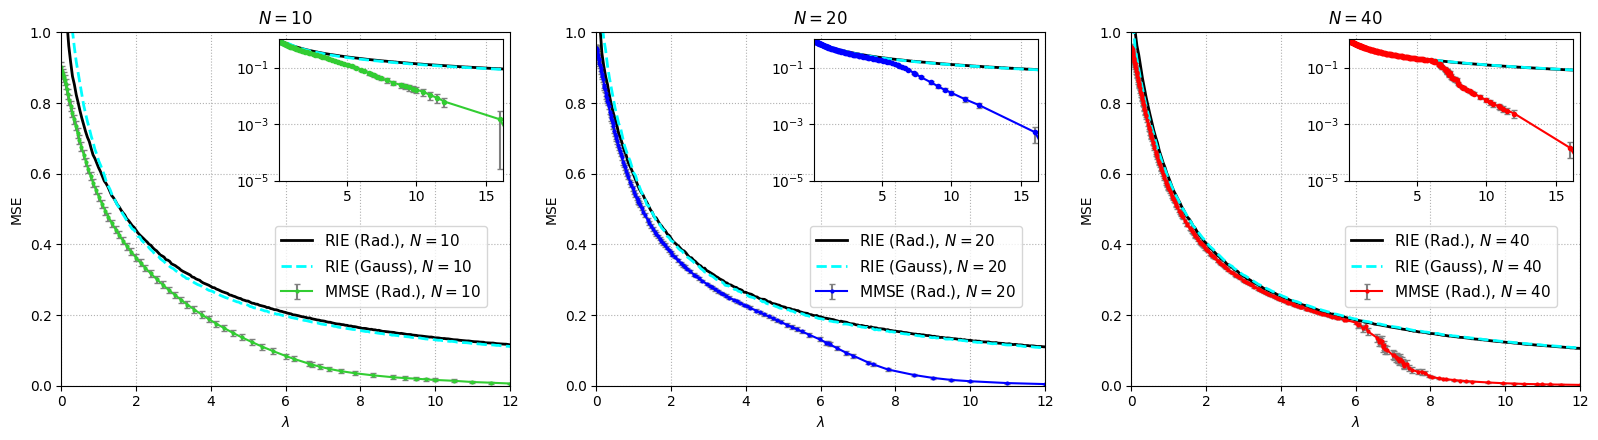

In [16]:

#Make 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(0.9*18, 0.9*5))
prior = "Rademacher"
prefix = prior + "_alpha" + "{:.2f}".format(alpha)
for N in Nlist:
    idx = Nlist.index(N)
    df = pd.read_csv(prefix + "_N" + str(N) + "_1007.csv")
    MI_average = df["MMSE_average"]
    MI_stdtot = 1.0001 * df["MMSE_stetot"]
    lambdas = df["lambda"]
    ax[idx].errorbar(lambdas, MI_average, yerr=MI_stdtot, label=r"MMSE (Rad.), $N =" + str(N) + "$", color=colorlist[idx],
                marker = "o", markersize = 2, ecolor = "gray", capsize = 2)
    df = pd.read_csv("MSE_RIE_alpha0.5_N" + str(N) + ".csv", header=None, names=["LL", "MSE", "MSEdev"])
    LL = df["LL"]
    MSE = df["MSE"]
    ax[idx].plot(LL, MSE, label=r"RIE (Rad.), " + "$N = " + str(N) + "$", color="black", linestyle="solid", lw = 2)

    df = pd.read_csv("MSE_RIE_Gauss_alpha0.5_N" + str(N) + ".csv", header=None, names=["LL", "MSE", "MSEdev"])
    LL_Gauss = df["LL"]
    MSE_Gauss = df["MSE"]
    ax[idx].plot(LL_Gauss, MSE_Gauss, label=r"RIE (Gauss), " + "$N = " + str(N) + "$", color="cyan", linestyle="--", lw = 2)

    #Add inset to ax[idx]
    ax_inset = inset_axes(ax[idx], width="50%", height="40%", loc="upper right")
    ax_inset.errorbar(lambdas, MI_average, yerr=MI_stdtot, color=colorlist[idx],
                   marker = "o", markersize = 3, ecolor = "gray", capsize = 2)
    ax_inset.plot(LL, MSE, color="black", linestyle="solid", lw = 2)
    ax_inset.plot(LL_Gauss, MSE_Gauss, color="cyan", linestyle="--", lw = 2)
    ax_inset.set_yscale("log")
    ax_inset.set_xlim(0.1, 16.2)
    ax_inset.set_ylim(1e-5, 1.0)
    ax_inset.grid(linestyle="dotted")


    ax[idx].legend(loc = "lower left", bbox_to_anchor=(0.46, 0.2) , fontsize=11)
    ax[idx].grid(linestyle="dotted")
    ax[idx].set_ylabel(r"MSE")
    ax[idx].set_xlim(0, 12)
    ax[idx].set_ylim(0.0, 1.0)
    ax[idx].set_xlabel(r"$\lambda$")
    ax[idx].set_title(r"$N = " + str(N) + "$")
plt.tight_layout()
plt.show()

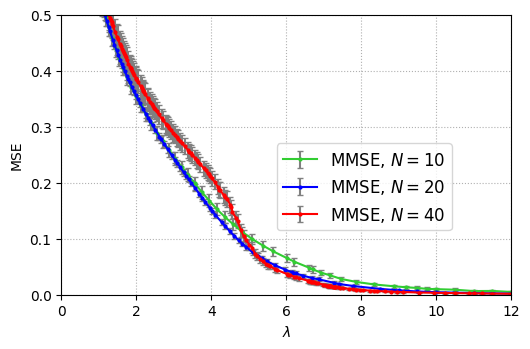

In [17]:
colorlist = ["limegreen", "blue", "red", "orange"]
Nlist = ["10", "20", "40"]
colorlist = ["limegreen", "blue", "red", "orange"]
#Make 3 subplots
fig, ax = plt.subplots(figsize=(9*0.6, 6*0.6))
prefix = "NonSym_alpha" + "{:.2f}".format(alpha)

for N in Nlist:
    idx = Nlist.index(N)
    df = pd.read_csv(prefix + "_N" + N + "_0305.csv")
    MI_average = df["MMSE_average"]
    MI_stdtot = 1.0001 * df["MMSE_stetot"]
    lambdas = df["lambda"]
    ax.errorbar(lambdas, MI_average, yerr=MI_stdtot, label=r"MMSE, $N =" + N + "$", color=colorlist[idx],
                marker = "o", markersize = 2, ecolor = "gray", capsize = 2)
    df = pd.read_csv("MSE_RIE_alpha0.5_N" + N + ".csv", header=None, names=["LL", "MSE", "MSEdev"])

    ax.legend(loc = "lower left", bbox_to_anchor=(0.46, 0.2) , fontsize=12)
    ax.grid(linestyle="dotted")
    ax.set_ylabel(r"MSE")
    ax.set_xlim(0, 12)
    ax.set_ylim(0.0, 0.5)
ax.set_xlabel(r"$\lambda$")
plt.tight_layout()
plt.show()

In [18]:
#Solve rank-one equations 
def f__(x, q, lam):
    return np.exp(-0.5 * x**2) * np.tanh( np.sqrt(lam * q) * x + lam * q )/ np.sqrt(2 * np.pi)

def RankOne(lam):
    err = 1
    eps = 1e-12 
    q = 1.0
    x_arr = np.linspace(-20.0, 20.0, 100)
    delta = x_arr[1] - x_arr[0]
    while err > eps: 
        q_ = delta * ( 0.5 * f__(x_arr[0] - delta, q, lam) + 0.5 * f__(x_arr[-1] + delta, q, lam) + sum( f__(x_arr, q, lam) ) )
        err = abs(q - q_)
        q = q_
    return q  

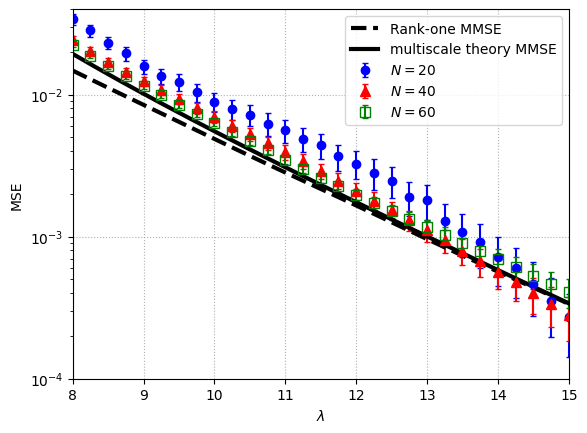

In [19]:
plt.figure(figsize=(0.8 * 8, 0.8 * 6))

DATA_20 = pd.read_csv("MMSE_alpha0.5_N20.csv")
DATA_40 = pd.read_csv("MMSE_alpha0.5_N40.csv")
DATA_60 = pd.read_csv("MMSE_alpha0.5_N60.csv")

lambda_list = np.linspace(8,15,100) 
RankOne_list = np.array([ RankOne(lam) for lam in lambda_list])
MMSE_list = 1.0  - RankOne_list**2

plt.errorbar(DATA_20["SNR"], DATA_20["MMSE"], yerr=DATA_20["MMSE_ste"],  capsize=2, marker="o", markersize = 6,  linestyle = "None",
             label=r"$N = 20$", color = "blue")
plt.errorbar(DATA_40["SNR"], DATA_40["MMSE"], yerr=DATA_40["MMSE_ste"],  capsize=2, marker="^", markersize = 7, linestyle = "None",
             label=r"$N = 40$", color = "red")
plt.errorbar(DATA_60["SNR"], DATA_60["MMSE"], yerr=DATA_60["MMSE_ste"],  capsize=2, marker="s", markersize = 7, mfc = "None", linestyle = "None",
             label=r"$N = 60$", color = "green")

plt.plot(lambda_list, MMSE_list, label="Rank-one MMSE", color="black", linestyle = "dashed", lw=3)

D = np.loadtxt("MMSE_alpha0.5000_cavity.txt")

plt.plot(D[:,0], D[:,1], label="multiscale theory MMSE", color="black", lw=3)

plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("MSE")
plt.legend()
plt.xlim(8, 15)
plt.ylim(1e-4, 0.04)

plt.grid(linestyle="dotted")

(0.0, 1.0)

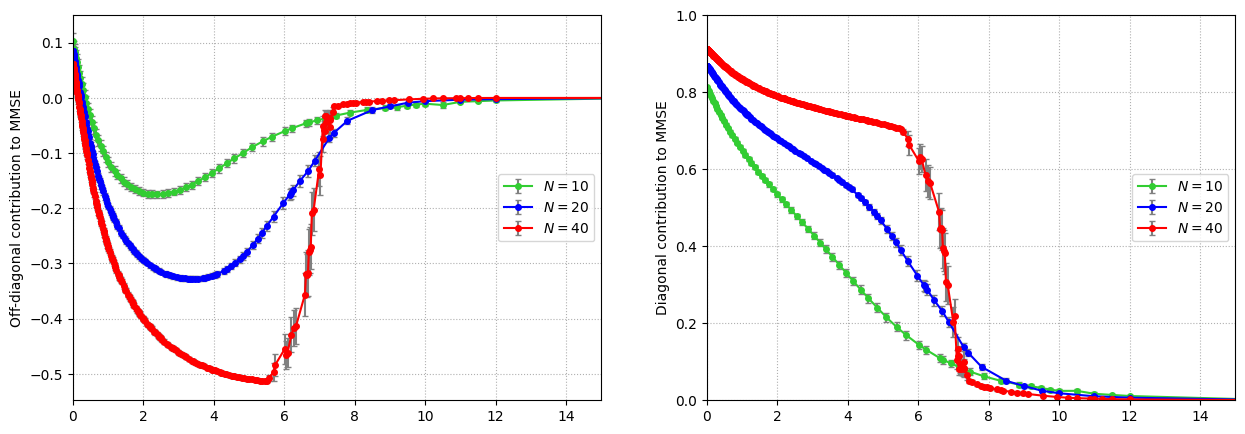

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
colorlist = ["limegreen", "blue", "red"]

for idx, N in enumerate([10, 20, 40]):
    data = pd.read_csv("OffDiag_contrib_N" + str(N) + ".csv")
    color = colorlist[idx]
    axes[0].errorbar(data["lambdas"], data["offdiag_contrib_MMSE"], yerr = data["offdiag_contrib_MMSE_std"],
                     label = r"$N = " + str(N) + "$", linestyle = "solid", color = color ,ecolor = "gray", 
                     marker = "o", markersize = 4, capsize = 2)
    axes[1].errorbar(data["lambdas"], data["diag_contrib_MMSE"], yerr = data["diag_contrib_MMSE_std"],
                     label = r"$N = " + str(N) + "$", linestyle = "solid", color = color ,ecolor = "gray", 
                     marker = "o", markersize = 4, capsize = 2)

axes[0].legend(loc = "center right")
axes[1].legend(loc = "center right")
axes[0].grid(linestyle = "dotted")
axes[1].grid(linestyle = "dotted")
axes[0].set_ylabel("Off-diagonal contribution to MMSE")
axes[1].set_ylabel("Diagonal contribution to MMSE")
axes[0].set_xlim(0, 15)
axes[1].set_xlim(0, 15)
axes[1].set_ylim(0, 1.0)
    

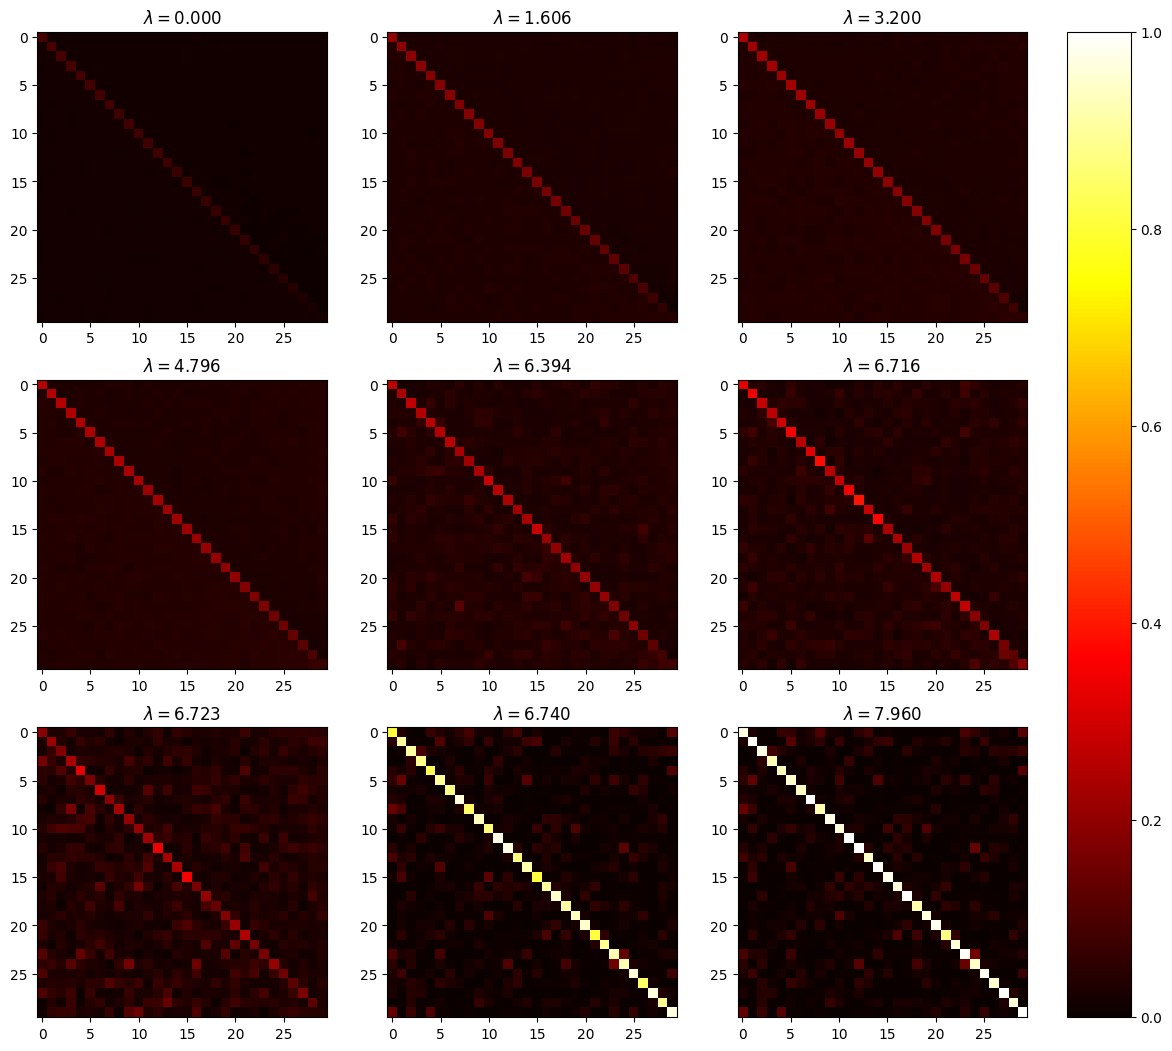

In [21]:
SNR_list = [0.000, 1.606, 3.200, 4.796, 6.394, 6.716, 6.723, 6.740, 7.960]
fig, axes = plt.subplots(3, 3, figsize=(16*0.8, 16*0.8))

data = np.loadtxt("overlapSq_flattened_alpha0.5_N60_1M.txt")
M = 30
for i, ax in enumerate(axes.flat):
    snr_index = np.argmin(np.abs( data[:,0] - SNR_list[i] ))
    mat = np.reshape( data[snr_index, 1:], (30, 30) )
    im = ax.imshow( mat, cmap= 'hot', vmin = 0, vmax = 1)
    ax.set_title(f'$\lambda = {data[snr_index,0]:.3f}$')
    ax.set_xticks(np.arange(0, M, 5))
    ax.set_yticks(np.arange(0, M, 5))
    
cbar_ax = fig.add_axes([0.93, 0.11, 0.05, 0.77])
fig.colorbar(im, cax=cbar_ax)
    

Text(0.5, 0, '$\\lambda$')

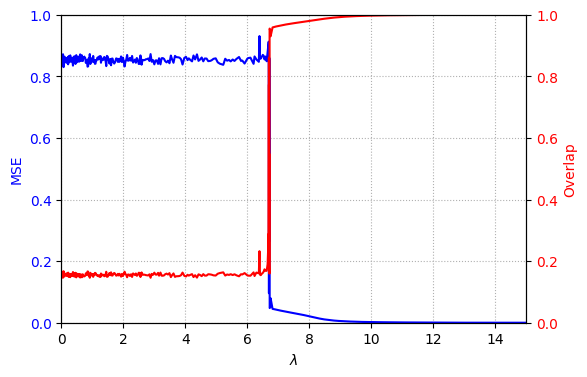

In [22]:
X_overlap_list = np.loadtxt("N60_alpha0.5_Xoverlap.txt")
X_MSE_list = np.loadtxt("N60_alpha0.5_XMSE.txt")

fig, ax1 = plt.subplots( figsize=(6, 4) )
ax2 = ax1.twinx()


ax1.plot(X_MSE_list[:,0], X_MSE_list[:,1], color='blue')
ax2.plot(X_overlap_list[:,0], X_overlap_list[:,1], color='red')

ax1.set_xlabel(r"$\lambda$")
ax1.set_ylabel(r"MSE", color='blue')
ax2.set_ylabel(r"Overlap", color='red')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

ax1.set_xlim(0, 15)
ax1.grid(linestyle = "dotted")
plt.xlabel(r"$\lambda$")

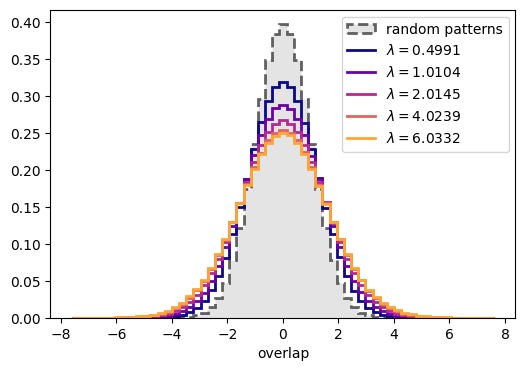

In [23]:
SNR_list = [0.4991,1.0104,2.0145, 4.0239, 6.0332]
plt.figure(figsize=(6,4))

M = 30
N = 60

colormap = plt.get_cmap('plasma', np.size(SNR_list) + 1)
data = pd.read_csv("OverlapHistogram_Denoising.csv")
bins = data["bins"]
hist_SNR0 = data["0"][:-1]

plt.stairs( hist_SNR0, bins, edgecolor = "black" , fill = True,
           facecolor = "lightgray", label = "random patterns", linestyle = "dashed", 
           alpha = 0.6,
           lw = 2)

for i in range(5):    
    hist_ = data["{:.4f}".format(SNR_list[i])][:-1]
    plt.stairs( hist_, bins, edgecolor = colormap(i), fill = False, label = "$\lambda = " + "{:.4f}".format(SNR_list[i]) + "$" ,lw = 2)
    
plt.legend()
plt.xlabel('overlap')
plt.show()


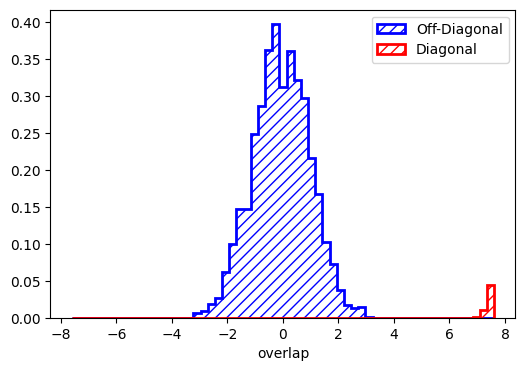

In [24]:
data = pd.read_csv("OverlapHistogram_Factorization.csv")

SNR_list = [0.4991,1.0104,2.0145, 4.0239, 6.0332]
plt.figure(figsize=(6,4))

M = 30
N = 60

colormap = plt.get_cmap('plasma', np.size(SNR_list) + 1)
data = pd.read_csv("OverlapHistogram_Factorization.csv")
bins = data["bins"]
hist_diag = data["Diagonal"][:-1]
hist_offdiag = data["Off_diagonal"][:-1]


plt.stairs( hist_offdiag, bins, edgecolor = "blue" , fill = True, facecolor = "None",
           color = "blue", hatch = "///", label = "Off-Diagonal", lw = 2)
plt.stairs( hist_diag, bins, edgecolor = "red" , fill = True, facecolor = "None",
           color = "red", hatch = "///", label = "Diagonal", lw = 2)

plt.legend()
plt.xlabel('overlap')
plt.show()


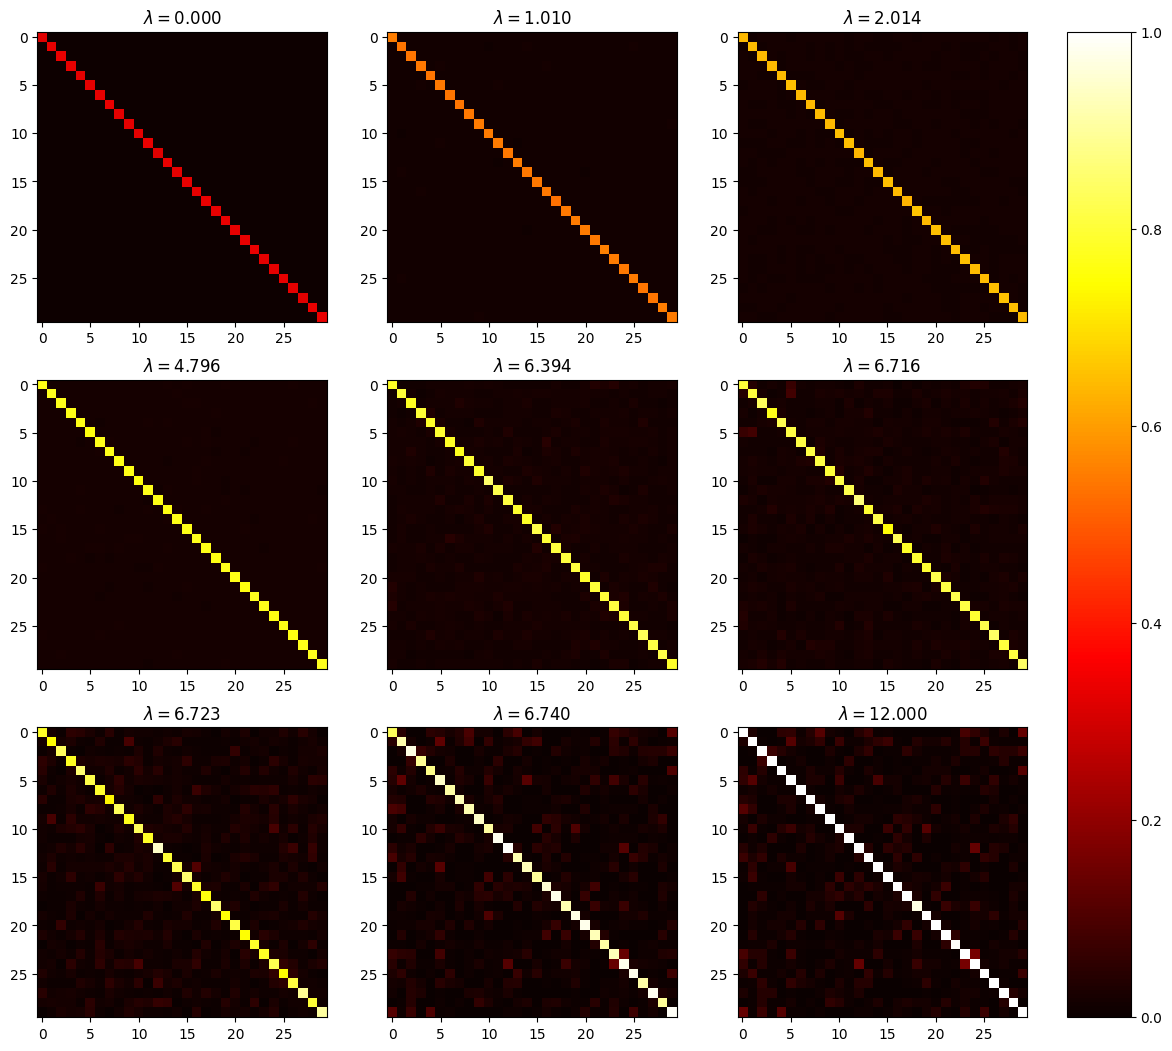

In [25]:
SNR_list = [0.000, 1.0104, 2.0145, 4.7955, 6.3936, 6.7160, 6.7228, 6.740, 12.0]
fig, axes = plt.subplots(3, 3, figsize=(16*0.8, 16*0.8))

data = np.loadtxt("optimalRotoverlap_flattened_alpha0.5_N60_1M.txt")
M = 30
for i, ax in enumerate(axes.flat):
    snr_index = np.argmin(np.abs( data[:,0] - SNR_list[i] ))
    mat = np.reshape( data[snr_index, 1:], (30, 30) )
    im = ax.imshow( mat, cmap= 'hot', vmin = 0, vmax = 1)
    ax.set_title(f'$\lambda = {data[snr_index,0]:.3f}$')
    ax.set_xticks(np.arange(0, M, 5))
    ax.set_yticks(np.arange(0, M, 5))
    
cbar_ax = fig.add_axes([0.93, 0.11, 0.05, 0.77])
fig.colorbar(im, cax=cbar_ax)
    